In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

In [2]:
df = pd.read_csv('data/out/evs.csv', usecols=lambda column: column != 'a')

In [3]:
q_1=[]
q_3=[]
for t in range(2014,2022):
    q_1.append(df[f"{t}"].quantile(0.25))
    q_3.append(df[f"{t}"].quantile(0.75))


In [4]:
df[df.Curso=='Matemática']

,Curso,Vagas,Tipo,2014,2015,2016,2017,2018,2019,2020,2021
14,Matemática,80.0,EXATAS,97,32,16,95,90,25,16,22


In [5]:
outliers = np.array(q_3)+1.5*(np.array(q_3)-np.array(q_1))
outliers.mean()

67.5

In [6]:
a = lambda x: df[df[f'{2014+x}']>outliers[x]]

In [7]:
b = dict()
for t in range(8):
    c = dict()
    can = a(t)[['Curso',f'{2014+t}']].values
    for v in can:
        c[v[0]]=v[1]
    b[f'{2014+t}']=c
    
    

In [8]:
for index, keys in enumerate(b.values()):
    for item in keys.items():
        print(item[1])
    print('\n')

131
108


52
156


37
32
32


95
91
107
89
184


218
188
213
374
216


56
46
40
43
54
78
43
56


34
44


41
55




In [9]:
b.values()

dict_values([{'Pedagogia': 131, 'Letras': 108}, {'Física': 52, 'Letras': 156}, {'Biblioteconomia': 37, 'Serviço Social': 32, 'Letras': 32}, {'Matemática': 95, 'Ciências Contábeis': 91, 'Ciências Sociais': 107, 'Meteorologia': 89, 'Economia': 184}, {'Física': 218, 'Direito': 188, 'Administração': 213, 'Letras': 374, 'Engenharia Civil': 216}, {'Pedagogia': 56, 'Física': 46, 'Turismo': 40, 'Geografia': 43, 'Psicologia': 54, 'Letras': 78, 'Engenharia Civil': 43, 'Engenharia da Computação': 56}, {'Física': 34, 'Letras': 44}, {'Física': 41, 'Letras': 55}])

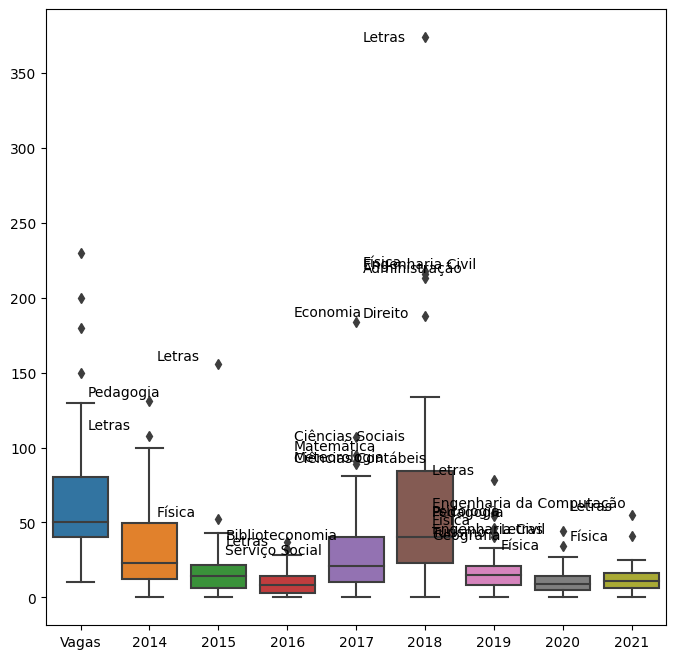

In [10]:
from matplotlib import rcParams


plt.figure(figsize=(8,8))
for index, keys in enumerate(b.values()):
    for item in keys.items():
        plt.text(index+0.1,item[1]-5+np.random.randint(1,10),f'{item[0]}')
# plt.hlines(xmin=-1,xmax=10,y=outliers.mean(),color='red',linestyle='--')
sns.boxplot(data=df)
plt.show()


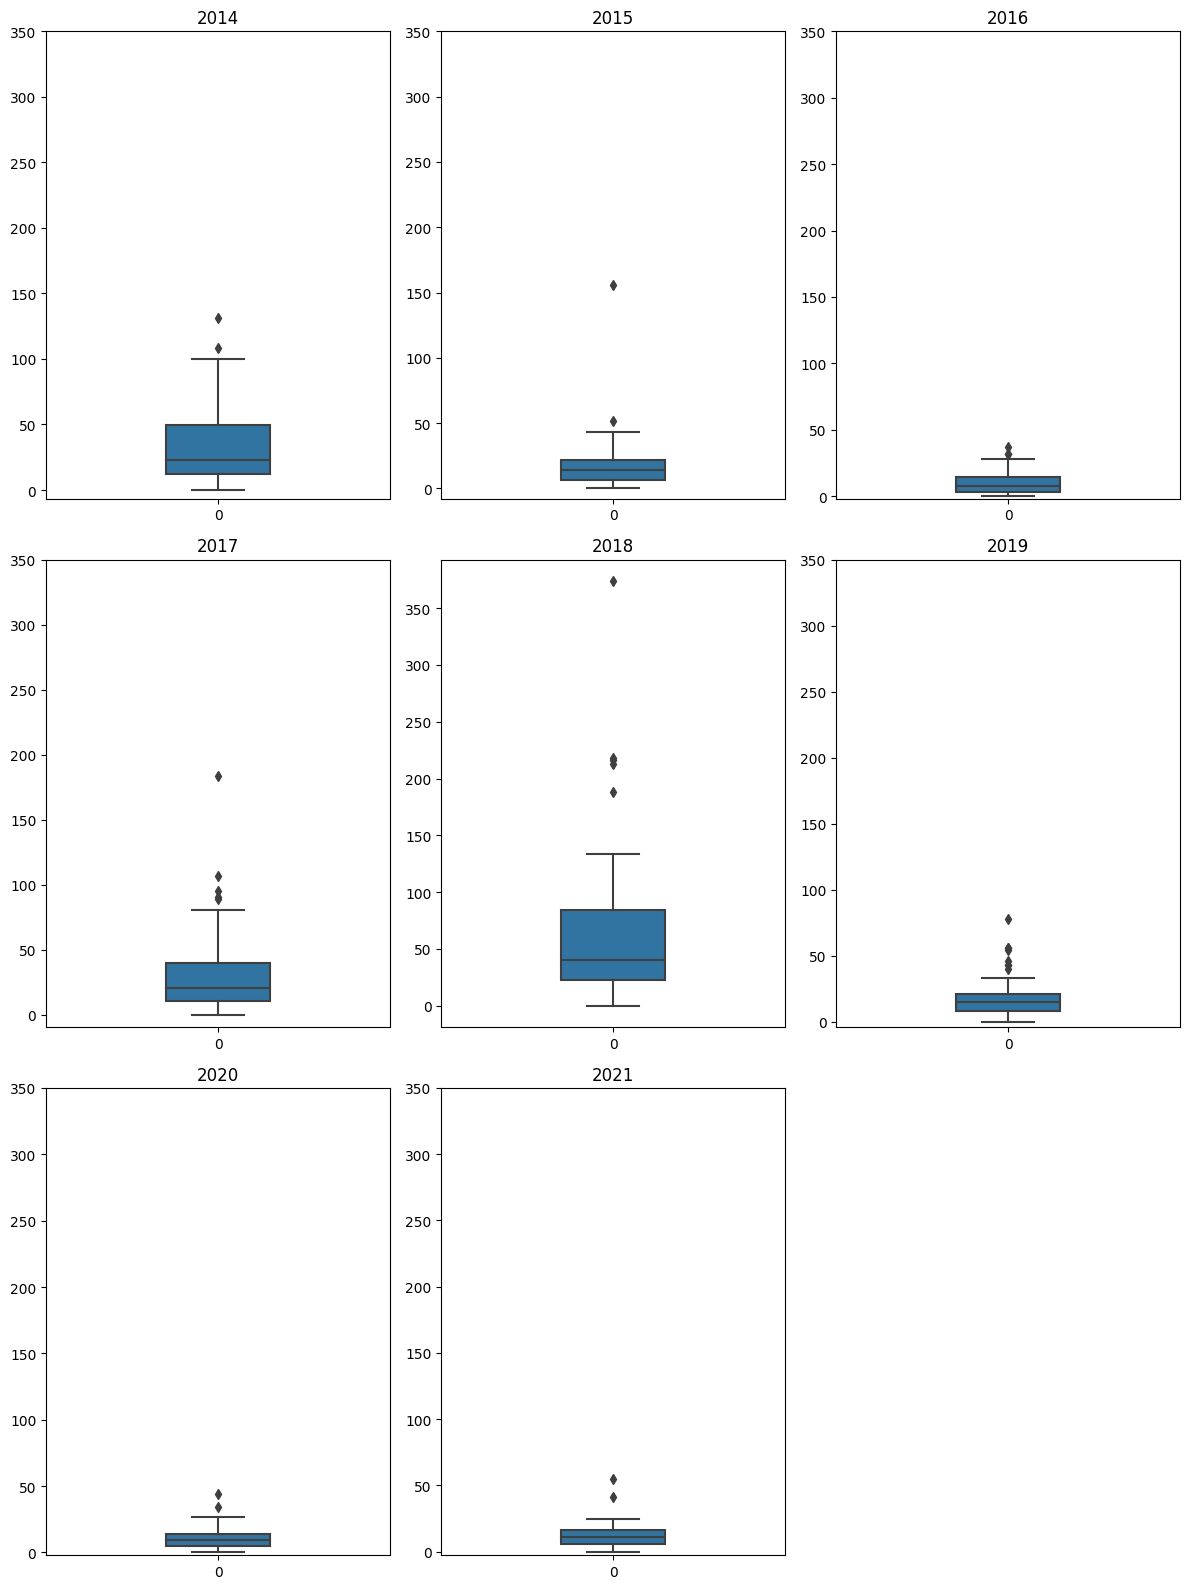

In [11]:
e=0
fig, axs = plt.subplots(3,3,figsize=(12,16))
for (t,keys) in zip(range(8),b.values()):
    x=int(np.floor(t/3))
    y=t%3
    year = str(2014+t)
    axs[x,y].grid(linestyle=":", axis='x', zorder=0)
    sns.boxplot(data=df[year],width=0.3,ax=axs[x,y])
    axs[x,y].set_yticks([x for x in range(0,400,50)])
    axs[x,y].set_title(year)
axs[2,2].axis('off')
plt.tight_layout()
# plt.savefig('gráficos/cursos_evasão.pdf',

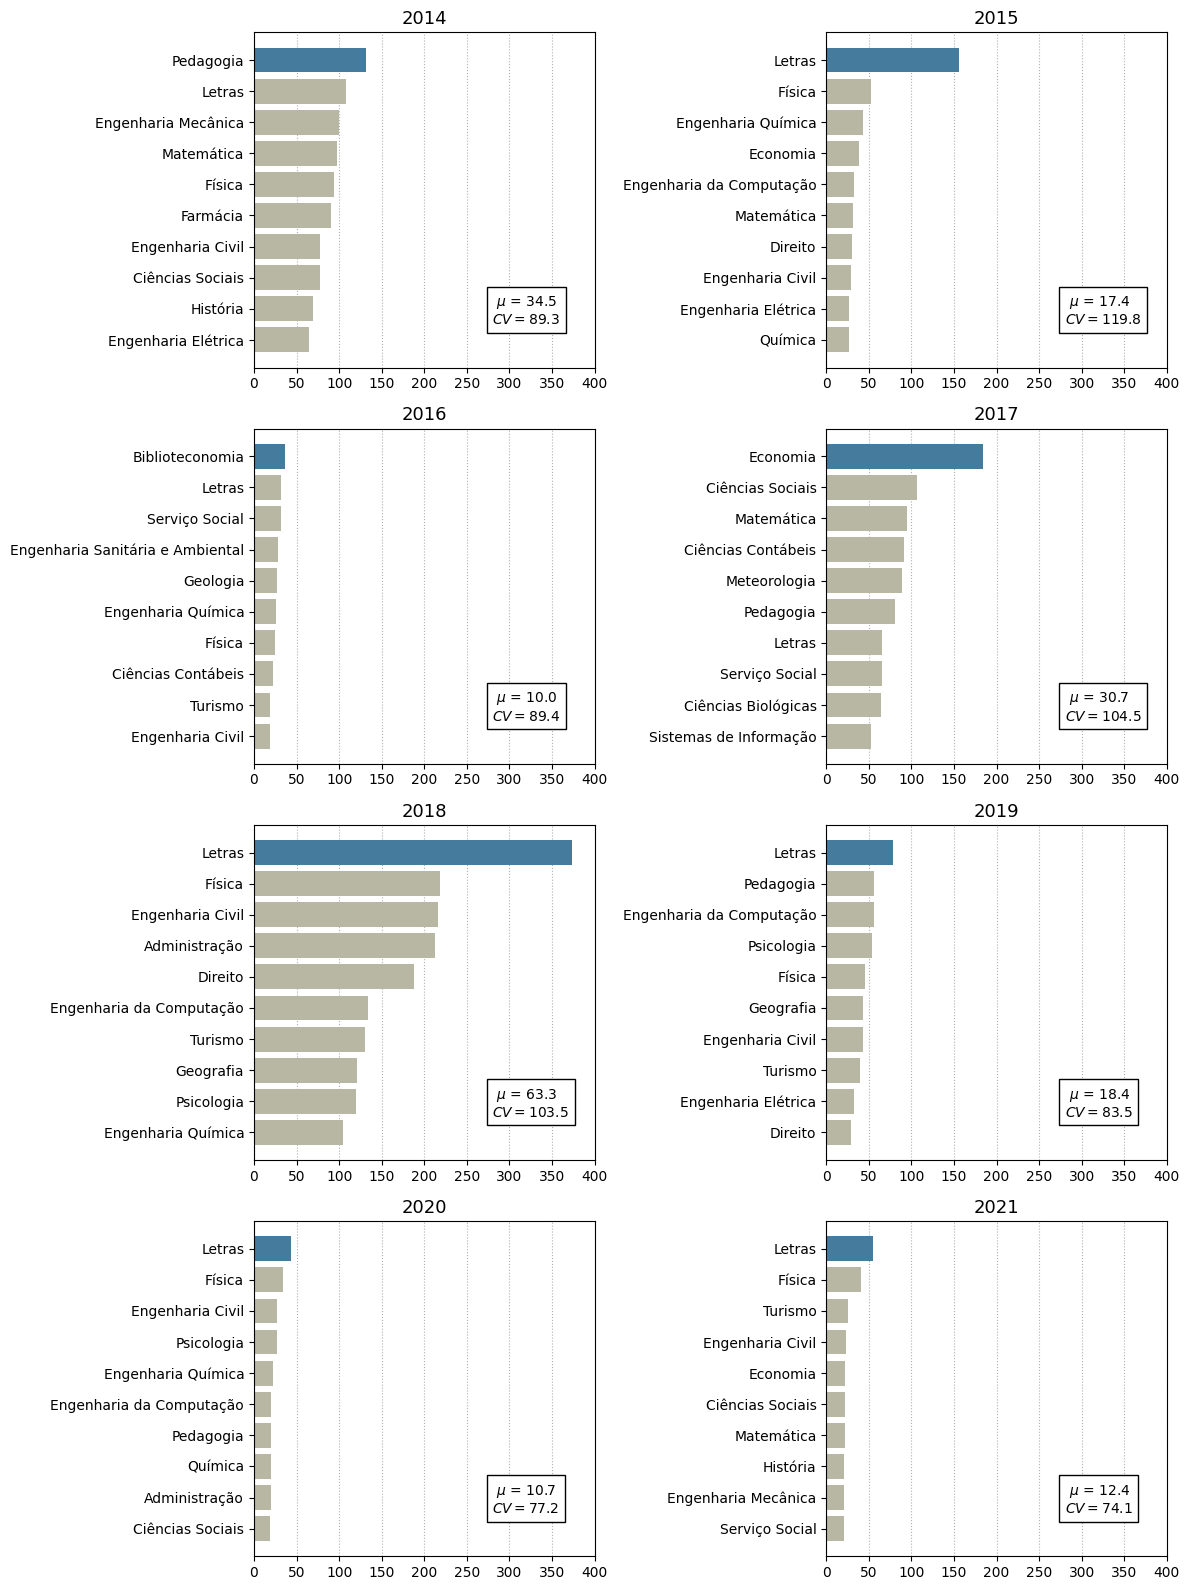

In [12]:
color_map = ["#b7b7a4" for _ in range(10)]
color_map[9] = "#457b9d"
fig, axs = plt.subplots(4,2,figsize=(12,16))
for t in range(8):
    x=int(np.floor(t/2))
    y=t%2
    year = str(2014+t)
    axs[x,y].grid(linestyle=":", axis='x', zorder=0)
    axs[x,y].barh(df.loc[df[year].sort_values(ascending=False)[:10].index[::-1]].Curso.values,
                  df[year].sort_values(ascending=False)[:10].values[::-1],color=color_map,zorder=2)
    mean = df[year].mean()
    std = df[year].std()/mean*100
    axs[x,y].text(280,0.5,f" $\mu$ = {mean:.1f}\n$CV =${std:.1f}",bbox=dict(facecolor='white',edgecolor='black'))
    axs[x,y].set_title(year)
    # axs[x,y].set_yticks(df[year].sort_values(ascending=False)[:10].index[::-1], fontsize=14)
    axs[x,y].set_xticks([x for x in range(0,401,50)])
    axs[x,y].set_title(f'{2014+t}', fontsize=13)
plt.tight_layout()
plt.savefig('gráficos/cursos_evasão_absoluto.pdf',
            dpi=400)

In [13]:
index_0 = df[[f'{x}' for x in range(2014,2022)]].T.sum().sort_values(ascending=False).index[:15]
df.loc[index_0]

,Curso,Vagas,Tipo,2014,2015,2016,2017,2018,2019,2020,2021
42,Letras,230.0,HUM,108,156,32,65,374,78,44,55
13,Física,130.0,EXATAS,94,52,25,43,218,46,34,41
43,Engenharia Civil,120.0,EXATAS,78,29,19,34,216,43,27,23
60,Economia,100.0,HUM,59,39,12,184,91,20,6,22
9,Pedagogia,180.0,HUM,131,20,10,81,73,56,20,16
14,Matemática,80.0,EXATAS,97,32,16,95,90,25,16,22
32,Ciências Sociais,100.0,HUM,78,25,15,107,96,29,19,22
25,Administração,130.0,HUM,48,18,6,24,213,23,20,21
18,Direito,200.0,HUM,34,30,8,40,188,29,15,13
44,Engenharia da Computação,40.0,EXATAS,44,33,18,24,134,56,20,12


In [14]:
idx = df.loc[index_0].Curso[::-1]
# idx.values[0] = 'Engenharia da\n Computação'

In [15]:
mean_sum = df[[f'{x}' for x in range(2014,2022)]].T.sum().mean()

In [16]:
df.loc[index_0][[f'{x}' for x in range(2014,2022)]].T.sum()[::-1]

35    278
50    282
48    292
28    312
30    328
44    341
18    357
25    373
32    391
14    393
9     407
60    433
43    469
13    553
42    912
dtype: int64

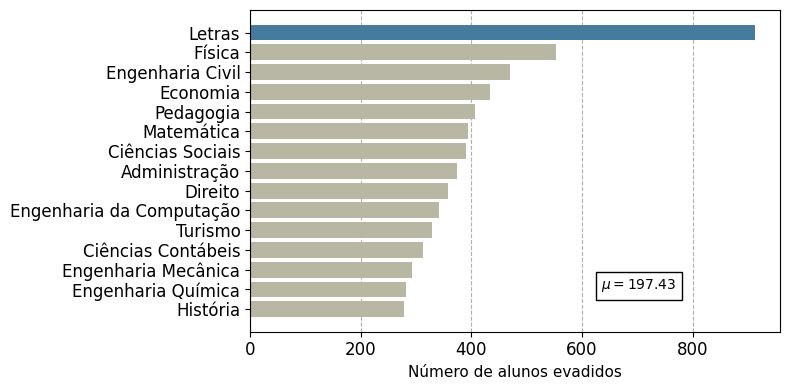

In [17]:
plt.figure(figsize=(8,4))
color_map = ["#b7b7a4" for _ in range(15)]
color_map[14] = "#457b9d"
plt.barh(idx,df.loc[index_0][[f'{x}' for x in range(2014,2022)]].T.sum()[::-1],color=color_map,zorder=2)
plt.grid(zorder=0,linestyle='dashed',axis='x')
plt.xlabel('Número de alunos evadidos',fontdict={'fontsize':11})
plt.tick_params(labelsize=12)
plt.text(635,1,f'$\mu={mean_sum:.2f}$',bbox=dict(facecolor='white',edgecolor='black'))
plt.tight_layout()
# plt.xlim(200,1000,200)
plt.savefig('gráficos/c_evasões.pdf',
            dpi=600)

In [18]:
df_prop = df[[f'{x}' for x in range(2014,2022)]].div(df.Vagas,axis=0)
df_prop['Curso'] = df.Curso

In [19]:
df.loc[df_prop['2014'].sort_values(ascending=False)[:10].index]

,Curso,Vagas,Tipo,2014,2015,2016,2017,2018,2019,2020,2021
12,Estatística,40.0,EXATAS,58,15,10,15,86,14,11,8
20,Farmácia,70.0,BIO,91,14,3,32,62,9,5,14
48,Engenharia Mecânica,80.0,EXATAS,100,15,11,29,74,28,14,21
14,Matemática,80.0,EXATAS,97,32,16,95,90,25,16,22
10,Ciência da Computação,40.0,EXATAS,46,13,7,39,23,18,8,4
44,Engenharia da Computação,40.0,EXATAS,44,33,18,24,134,56,20,12
47,Engenharia Elétrica,70.0,EXATAS,65,27,9,17,94,33,17,13
3,Música,30.0,HUM,27,6,5,3,31,9,3,0
39,Meteorologia,30.0,EXATAS,26,18,17,89,36,12,10,16
35,História,80.0,HUM,69,24,5,25,104,19,11,21


In [20]:
df_prop[[f'{x}' for x in range(2014,2022)]].T.mean().sort_values(ascending=False)[:15]

44    1.065625
39    0.933333
50    0.705000
12    0.678125
45    0.625000
14    0.614063
37    0.595833
36    0.558333
60    0.541250
13    0.531731
15    0.512500
30    0.512500
42    0.495652
10    0.493750
47    0.491071
dtype: float64

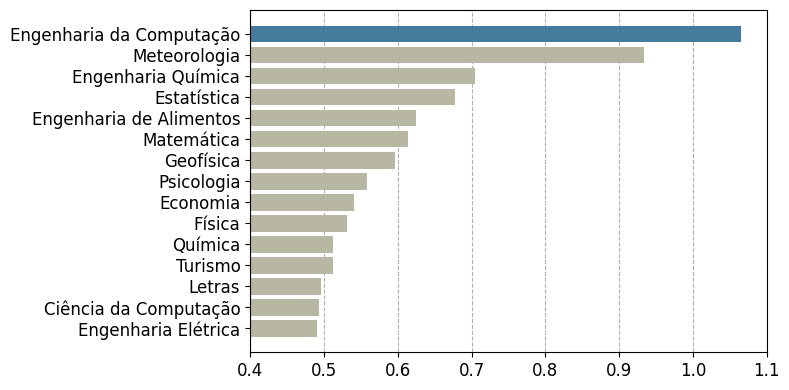

In [21]:
plt.figure(figsize=(8,4))
color_map = ["#b7b7a4" for _ in range(20)]
color_map[14]= "#457b9d"
index_1 = df_prop[[f'{x}' for x in range(2014,2022)]].T.mean().sort_values(ascending=False)[:15]
plt.barh(df.loc[index_1.index]['Curso'][::-1],index_1.values[::-1],color=color_map,zorder=2)
plt.xlim(0.4,1.1)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.grid(zorder=0,linestyle='dashed',axis='x')
plt.savefig('gráficos/prop_curso.pdf',
            dpi=600)

In [22]:
k = df[[f'{x}' for x in range(2014,2022)]].T.sum()/df.Vagas*8
index_ = k.sort_values(ascending=False)[:30].index
df.loc[index_]

,Curso,Vagas,Tipo,2014,2015,2016,2017,2018,2019,2020,2021
44,Engenharia da Computação,40.0,EXATAS,44,33,18,24,134,56,20,12
39,Meteorologia,30.0,EXATAS,26,18,17,89,36,12,10,16
50,Engenharia Química,50.0,EXATAS,32,43,26,23,105,16,22,15
12,Estatística,40.0,EXATAS,58,15,10,15,86,14,11,8
45,Engenharia de Alimentos,30.0,EXATAS,16,22,8,12,60,12,12,8
14,Matemática,80.0,EXATAS,97,32,16,95,90,25,16,22
37,Geofísica,30.0,EXATAS,11,17,15,27,38,11,5,19
36,Psicologia,60.0,HUM,28,18,5,11,120,54,27,5
60,Economia,100.0,HUM,59,39,12,184,91,20,6,22
13,Física,130.0,EXATAS,94,52,25,43,218,46,34,41


In [50]:
values[1]

16

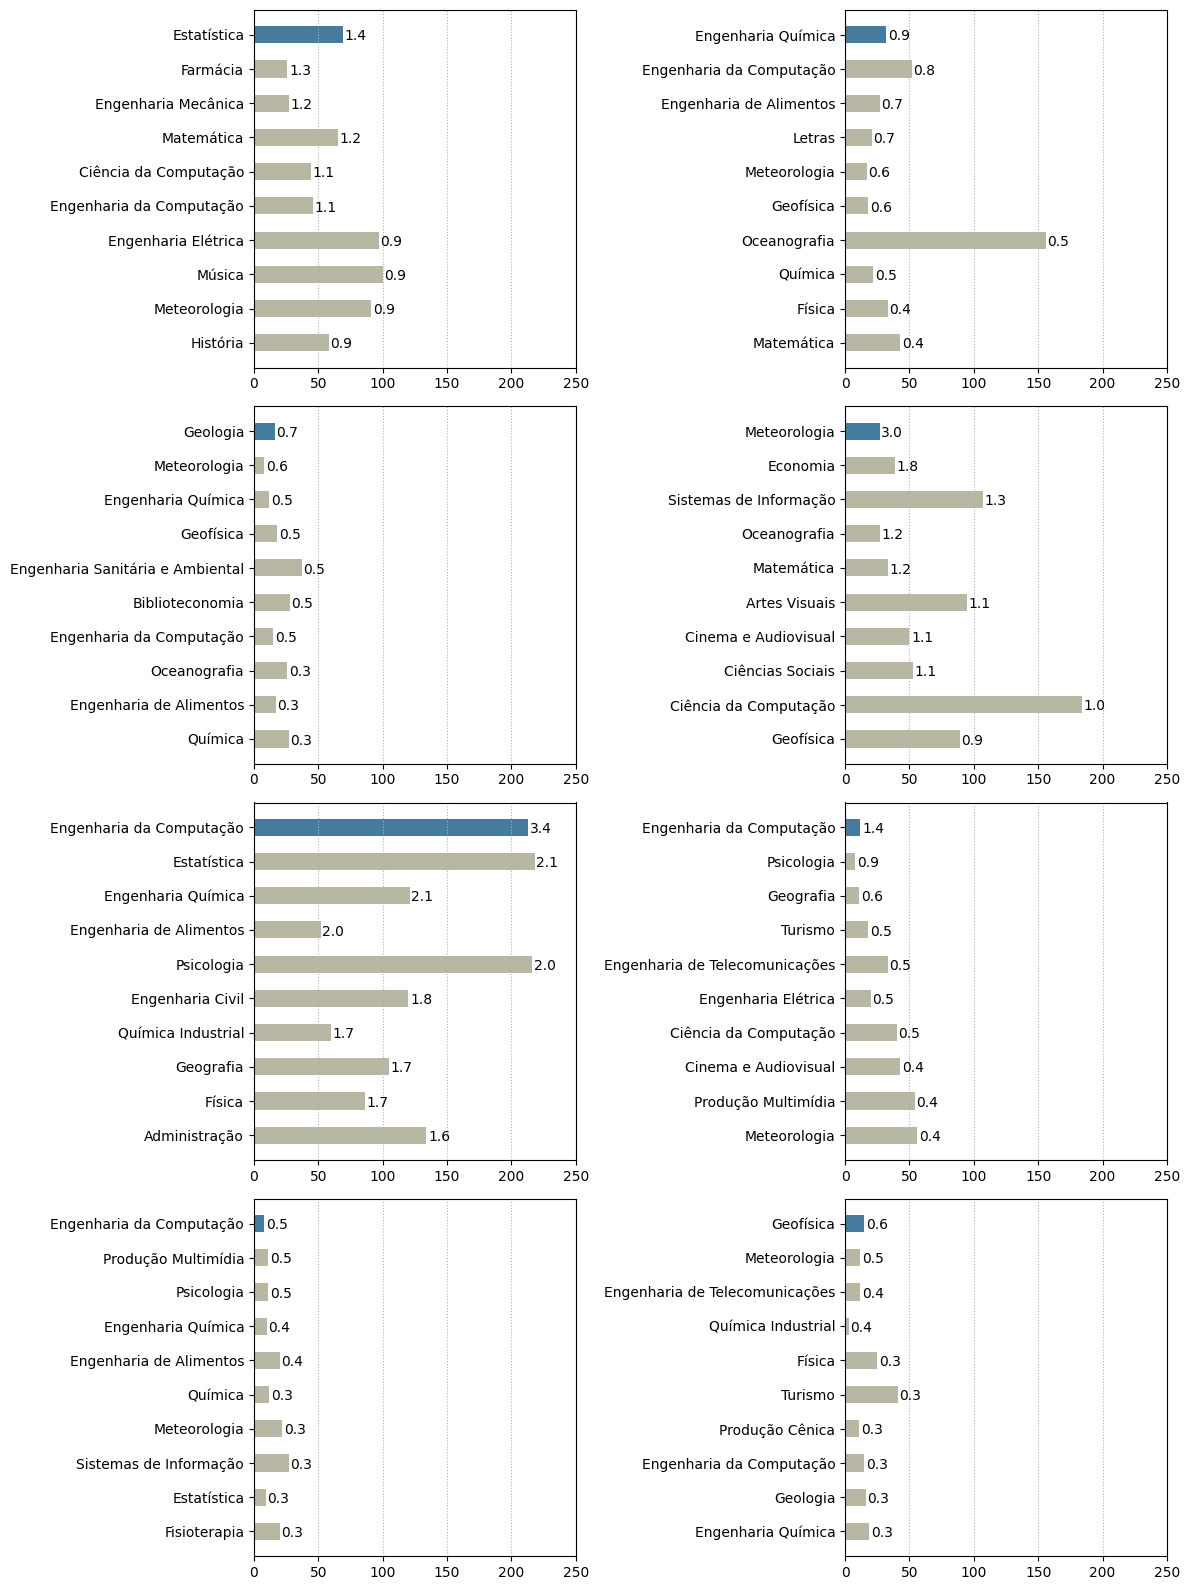

In [64]:
color_map = ["#b7b7a4" for _ in range(10)]
color_map[9] = "#457b9d"
font = {'family': 'Sans-serif',
        'color':  '#000000'
        }
fig, axs = plt.subplots(4,2,figsize=(12,16))
for t in range(8):
    x=int(np.floor(t/2))
    y=t%2
    year = str(2014+t)
    axs[x,y].grid(linestyle=":", axis='x', zorder=0)
    values = df.loc[df_prop[year].sort_values(ascending=False)[:10].index][year].values
    axs[x,y].barh(df.loc[df_prop[year].sort_values(ascending=False)[:10].index].Curso.values[::-1],
                  values, color=color_map,
                  height=0.5)
    axs[x,y].set_xticks([x for x in range(0,251,50)])
    for t in range(10):
        string = df_prop[year].sort_values(ascending=False)[:10].values[9-t]
        axs[x,y].text(values[t]+1.2,t-0.165,f'{string:.1f}', fontdict=font)
    
plt.tight_layout()
plt.savefig('gráficos/cursos_evasão.pdf',
            dpi=400)